In [45]:
# Misc
def plot_accuracy_and_loss(history1, title1, history2, title2):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.plot(history1.history['accuracy'], label=f'{title1} Train Accuracy')
  plt.plot(history1.history['val_accuracy'], label=f'{title1} Val Accuracy')
  plt.plot(history2.history['accuracy'], label=f'{title2} Train Accuracy', linestyle='--')
  plt.plot(history2.history['val_accuracy'], label=f'{title2} Val Accuracy', linestyle='--')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.plot(history1.history['loss'], label=f'{title1} Train Loss')
  plt.plot(history1.history['val_loss'], label=f'{title1} Val Loss')
  plt.plot(history2.history['loss'], label=f'{title2} Train Loss', linestyle='--')
  plt.plot(history2.history['val_loss'], label=f'{title2} Val Loss', linestyle='--')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

In [1]:
!pip install ucimlrepo

Z opisu zbioru:

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.  The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions.  The transmitted sonar signal is a frequency-modulated chirp, rising in frequency.  The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).  The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.5630 - loss: 0.6603 - val_accuracy: 0.7619 - val_loss: 0.4991
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8682 - loss: 0.4053 - val_accuracy: 0.7857 - val_loss: 0.3864
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8655 - loss: 0.2850 - val_accuracy: 0.8571 - val_loss: 0.2653
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9551 - loss: 0.1552 - val_accuracy: 0.9048 - val_loss: 0.2107
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9864 - loss: 0.0751 - val_accuracy: 0.9286 - val_loss: 0.2032
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9963 - loss: 0.0464 - val_accuracy: 0.9048 - val_loss: 0.2672
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0323 - val_accuracy: 0.9286 - val_loss: 0.2801
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.9048 - val_loss: 0.2174
Epo

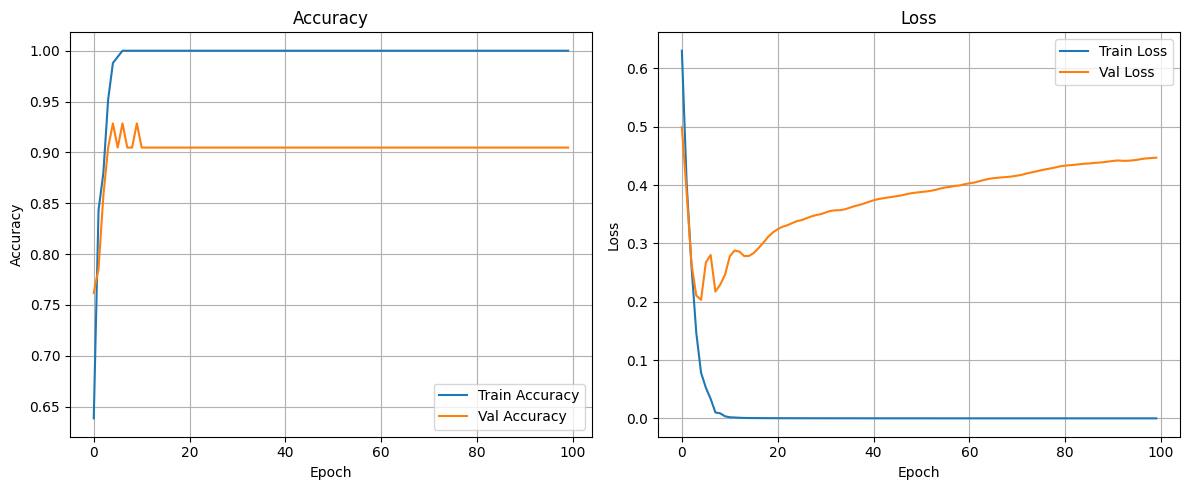

In [166]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

sonar = fetch_ucirepo(id=151)
X_raw = sonar.data.features   # 208×60
y_raw = sonar.data.targets    # 'R' or 'M'

# Zmiana na binarne dane: Rock=0, Mine=1
y = (y_raw == 'M').astype(int)

# Split na dane uczące i testowe
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Przeskalowanie
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# (zbyt) Duży model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64,  activation='relu'),
    Dense(1,   activation='sigmoid')
])


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


start = time.time()
# Trening
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start} sekund")

# Wykresy
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],  label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],      label='Train Loss')
plt.plot(history.history['val_loss'],  label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Jak widać błąd dla jest znacznie wyższy przy testowaniu i celność spada o 0.1 względem uczenia.

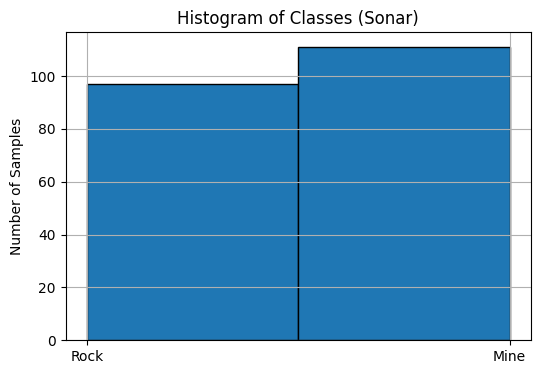

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(y, bins=2, edgecolor='k')
plt.xticks([0, 1], ['Rock', 'Mine'])
plt.title('Histogram of Classes (Sonar)')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()


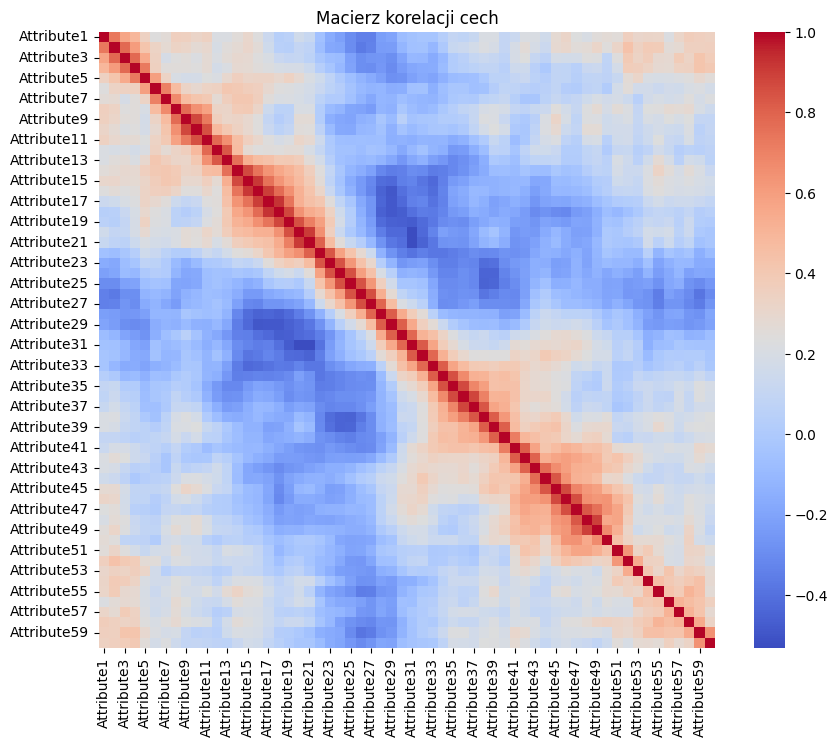

In [16]:

# Correlation matrix heatmap
corr_matrix = X_raw.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Macierz korelacji cech")
plt.show()



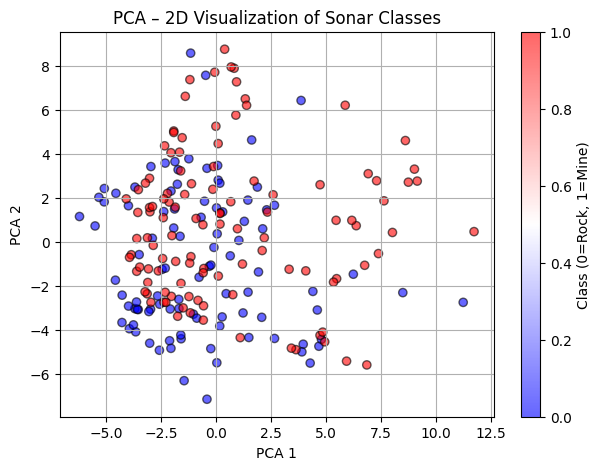

In [17]:
# PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

y = (y_raw.values.flatten() == 'M').astype(int)
plt.figure(figsize=(7, 5))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='bwr',
    alpha=0.6, edgecolors='k'
)
plt.title('PCA – 2D Visualization of Sonar Classes')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
cbar = plt.colorbar(label='Class (0=Rock, 1=Mine)')
plt.show()

Klasy są dosyć zmieszane, ale widać pewne przesunięcie kamieni względem metali.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


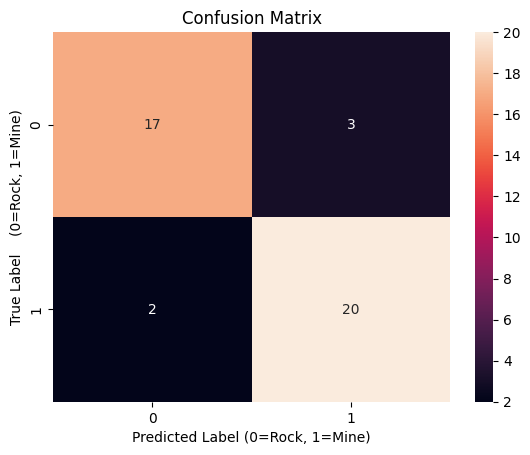

In [22]:
# Macierz pomyłek
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label (0=Rock, 1=Mine)')
plt.ylabel('True Label    (0=Rock, 1=Mine)')
plt.show()

# 1. Uproszczenie modelu


In [168]:
# mniejszy model
small_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1,   activation='sigmoid')
])


small_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


start = time.time()
# Trening
small_history = small_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5091 - loss: 0.6798 - val_accuracy: 0.5952 - val_loss: 0.6590
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6615 - loss: 0.6294 - val_accuracy: 0.6667 - val_loss: 0.6255
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6769 - loss: 0.6025 - val_accuracy: 0.7143 - val_loss: 0.5966
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7542 - loss: 0.5938 - val_accuracy: 0.7619 - val_loss: 0.5695
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7952 - loss: 0.5553 - val_accuracy: 0.7619 - val_loss: 0.5453
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8382 - loss: 0.5126 - val_accuracy: 0.7857 - val_loss: 0.5224
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8583 - loss: 0.4930 - val_accuracy: 0.7857 - val_loss: 0.4999
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8466 - loss: 0.4601 - val_accuracy: 0.7857 - val_loss: 0.4793
Epoc

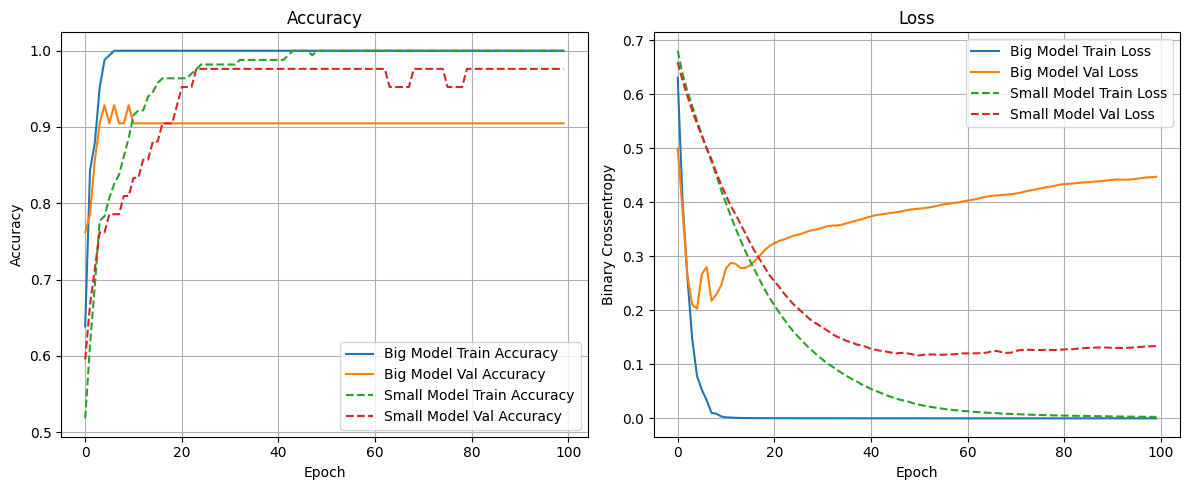

In [169]:
plot_accuracy_and_loss(history, 'Big Model', small_history, 'Small Model')

# Ocena
Uproszczenie modelu delikatnie poprawiło celność i zminiejszyło straty o połowę

# 2. Dropout

In [62]:
from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64,  activation='relu'),
    Dense(1,   activation='sigmoid')
])

dropout_model.compile(optimizer=Adam(5e-4), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

dropout_history = dropout_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5235 - loss: 0.7134 - val_accuracy: 0.7619 - val_loss: 0.6175
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6993 - loss: 0.6300 - val_accuracy: 0.7143 - val_loss: 0.5597
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8617 - loss: 0.5240 - val_accuracy: 0.7857 - val_loss: 0.4962
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8568 - loss: 0.4527 - val_accuracy: 0.7857 - val_loss: 0.4553
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8470 - loss: 0.4041 - val_accuracy: 0.7857 - val_loss: 0.4229
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8697 - loss: 0.3476 - val_accuracy: 0.8333 - val_loss: 0.3648
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9042 - loss: 0.2872 - val_accuracy: 0.8810 - val_loss: 0.2971
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9427 - loss: 0.2235 - val_accuracy: 0.9286 - val_loss: 0.2455
Epoc

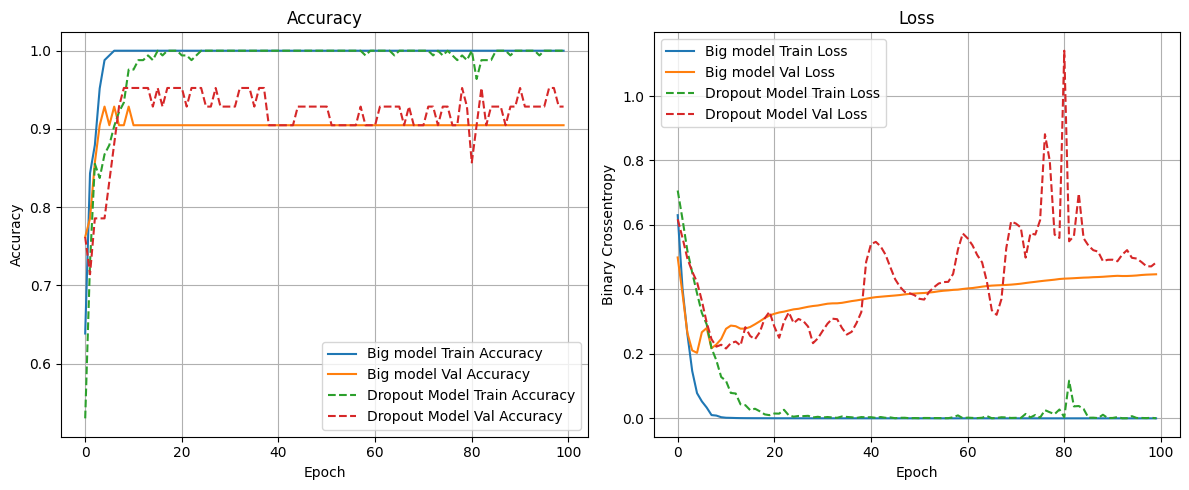

In [170]:
plot_accuracy_and_loss(history, 'Big model', dropout_history, 'Dropout Model')

# Ocena
Dropout niezależnie od dobranych parametrów nie chciał dać lepszych wyników dla strat, natomiast poprawił celność (niby tylko o 0.05 ale to połowa tego co można osiągnąć maksymalnie z 0.9 xD)

# 3. L2


In [88]:
from tensorflow.keras.regularizers import l2

l2_model = Sequential([
    Dense(512, activation='relu',
          kernel_regularizer=l2(1e-8),
          input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu',
          kernel_regularizer=l2(1e-8)),
    Dense(128, activation='relu',
          kernel_regularizer=l2(1e-8)),
    Dense(64, activation='relu',
          kernel_regularizer=l2(3e-5)),
    Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

l2_history = l2_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6032 - loss: 0.6599 - val_accuracy: 0.8095 - val_loss: 0.4904
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8371 - loss: 0.4104 - val_accuracy: 0.8095 - val_loss: 0.3937
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8752 - loss: 0.2982 - val_accuracy: 0.8571 - val_loss: 0.3195
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9275 - loss: 0.1917 - val_accuracy: 0.9286 - val_loss: 0.2573
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9873 - loss: 0.0866 - val_accuracy: 0.9286 - val_loss: 0.2202
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9911 - loss: 0.0558 - val_accuracy: 0.9524 - val_loss: 0.2247
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0237 - val_accuracy: 0.9762 - val_loss: 0.2244
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 0.9524 - val_loss: 0.2123
Epoc

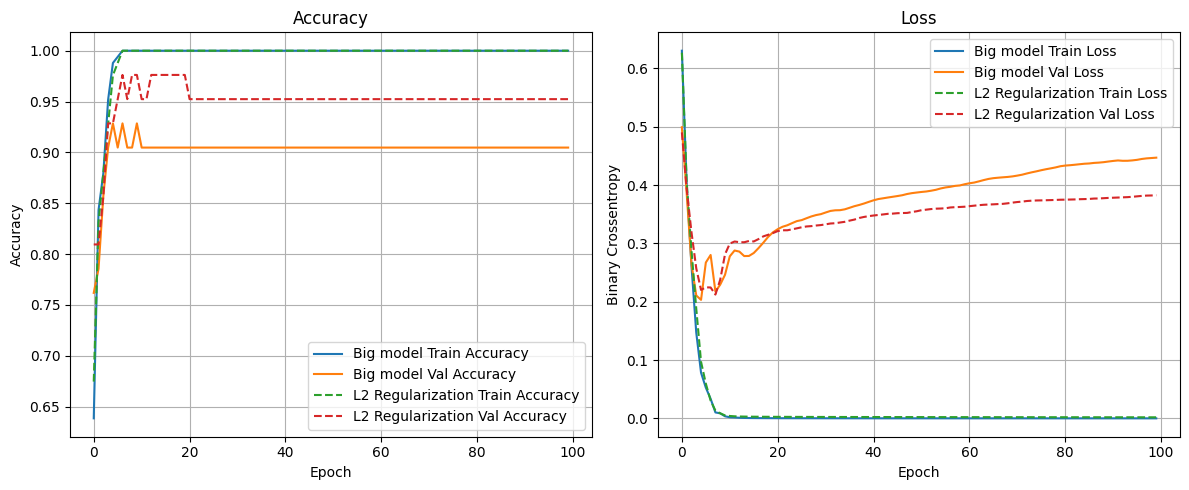

In [171]:
plot_accuracy_and_loss(history, 'Big model', l2_history, 'L2 Regularization')

# Ocena
Udało się obniżyć starty i podnieść celność.

# 4. L1

In [99]:
from tensorflow.keras.regularizers import l1

l1_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(1e-8), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l1(1e-5)),
    Dense(128, activation='relu', kernel_regularizer=l1(1e-5)),
    Dense(64, activation='relu', kernel_regularizer=l1(1e-3)),
    Dense(1, activation='sigmoid')
])

l1_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
l1_history = l1_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6087 - loss: 1.4521 - val_accuracy: 0.7619 - val_loss: 1.2657
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8470 - loss: 1.1993 - val_accuracy: 0.8810 - val_loss: 1.0833
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9411 - loss: 0.9790 - val_accuracy: 0.8810 - val_loss: 0.9720
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9624 - loss: 0.8581 - val_accuracy: 0.9048 - val_loss: 0.9058
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9851 - loss: 0.7651 - val_accuracy: 0.9286 - val_loss: 0.8197
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9925 - loss: 0.6953 - val_accuracy: 0.9286 - val_loss: 0.7720
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.6448 - val_accuracy: 0.9286 - val_loss: 0.7610
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.6099 - val_accuracy: 0.9048 - val_loss: 0.7556
Epoc

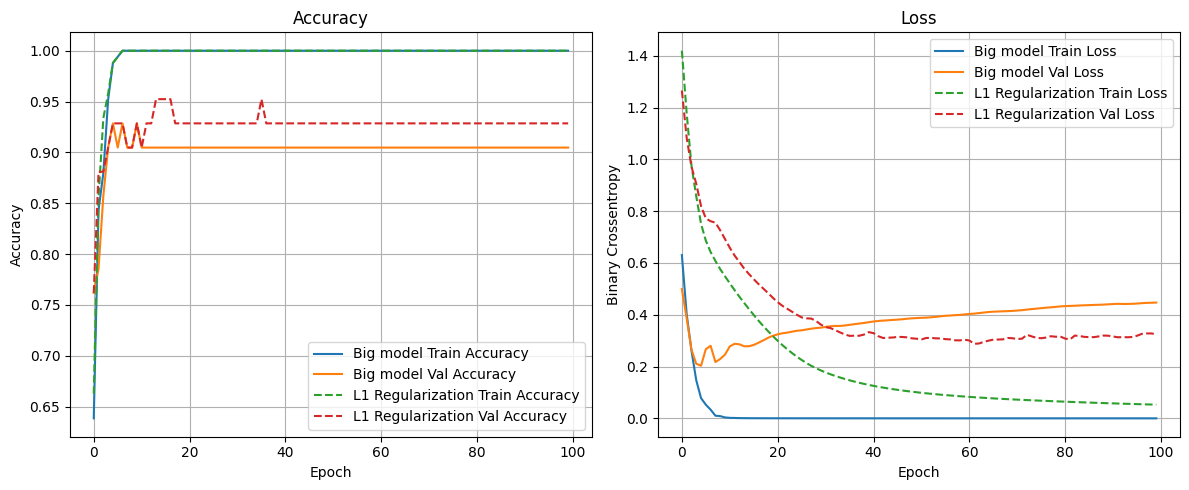

In [172]:
plot_accuracy_and_loss(history, 'Big model', l1_history, 'L1 Regularization')

# Ocena
Straty odrobinę lepiej niż przy L2, a celność odrobinę gorzej.

# 5. Early Stopping


In [107]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

early_stop_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start = time.time()

early_history = early_stop_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.6178 - loss: 0.6564 - val_accuracy: 0.7857 - val_loss: 0.4898
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8749 - loss: 0.4209 - val_accuracy: 0.8571 - val_loss: 0.3482
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9097 - loss: 0.2515 - val_accuracy: 0.8810 - val_loss: 0.2809
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9333 - loss: 0.1897 - val_accuracy: 0.8333 - val_loss: 0.2439
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9680 - loss: 0.1089 - val_accuracy: 0.9048 - val_loss: 0.1492
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9974 - loss: 0.0462 - val_accuracy: 0.9048 - val_loss: 0.1715
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0189 - val_accuracy: 0.8810 - val_loss: 0.2248
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.9048 - val_loss: 0.2563
Epoc

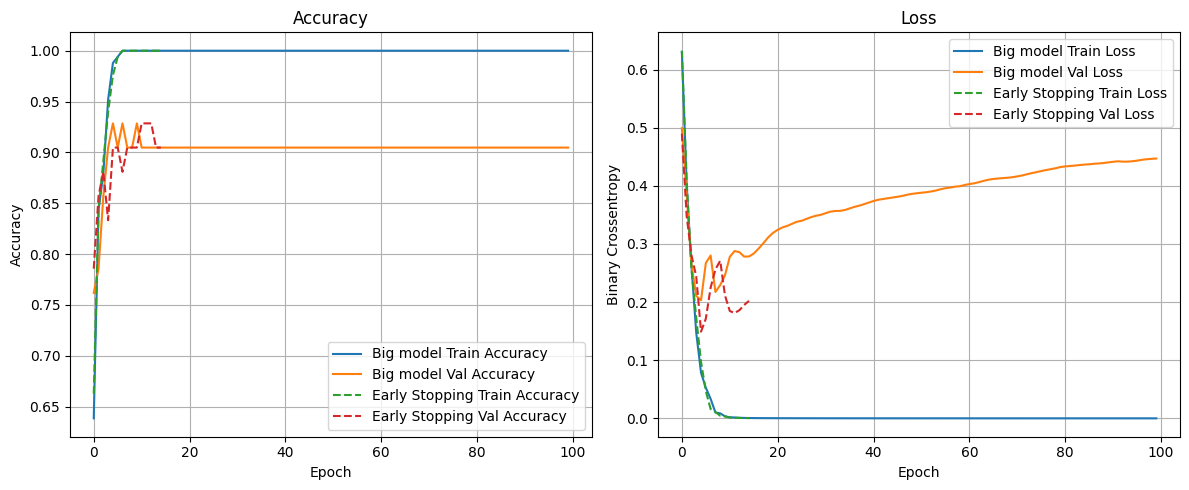

In [173]:
plot_accuracy_and_loss(history, 'Big model', early_history, 'Early Stopping')

# Ocena
Early stopping w tym przypadku może nieznacznie poprawić celność i starty. Wyniki bardzo losowe w zależności od wywołania. Za to czas wykonywania dużo szybszy dzięki przerwaniu po kilkunastu epokach.

# Połączony model

In [156]:
from tensorflow.keras.regularizers import l1_l2
reg_big   = l1_l2(l1=1e-6, l2=1e-4)
reg_mid   = l1_l2(l1=1e-7, l2=1e-5)
reg_small = l1_l2(l1=1e-8, l2=1e-6)

combined_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=reg_big, input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=reg_mid),
    Dropout(0.2),
    Dense(64, activation='relu',  kernel_regularizer=reg_small),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

combined_model.compile(optimizer=Adam(5e-4), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
combined_history = combined_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)
end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5113 - loss: 0.7152 - val_accuracy: 0.6905 - val_loss: 0.6355
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5823 - loss: 0.6597 - val_accuracy: 0.7143 - val_loss: 0.5853
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7195 - loss: 0.5854 - val_accuracy: 0.7381 - val_loss: 0.5514
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7715 - loss: 0.5498 - val_accuracy: 0.7381 - val_loss: 0.5221
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7777 - loss: 0.5536 - val_accuracy: 0.7619 - val_loss: 0.4955
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7896 - loss: 0.4798 - val_accuracy: 0.7381 - val_loss: 0.4724
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8734 - loss: 0.4261 - val_accuracy: 0.7619 - val_loss: 0.4579
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8563 - loss: 0.4257 - val_accuracy: 0.8095 - val_loss: 0.4454
Epoc

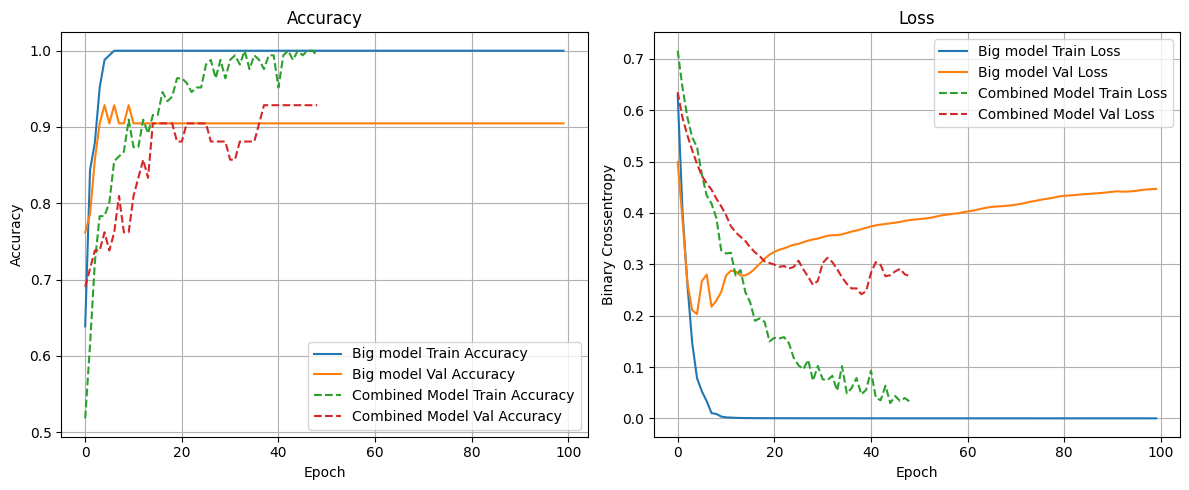

In [174]:
plot_accuracy_and_loss(history, 'Big model', combined_history, 'Combined Model')

Połączony model nie radzi sobie jakoś lepiej niż proste zmniejszenie sieci.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


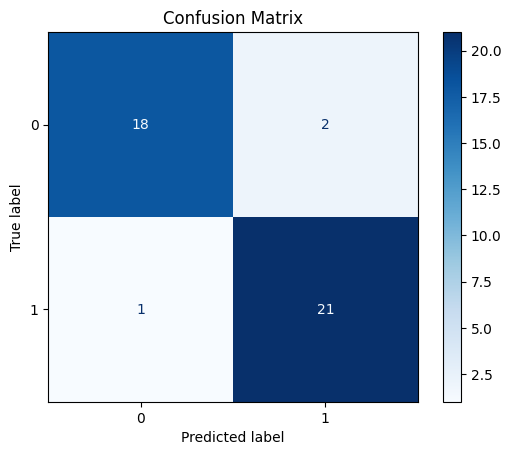

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.91      0.95      0.93        22

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



In [164]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve, auc

y_pred = combined_model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_labels))


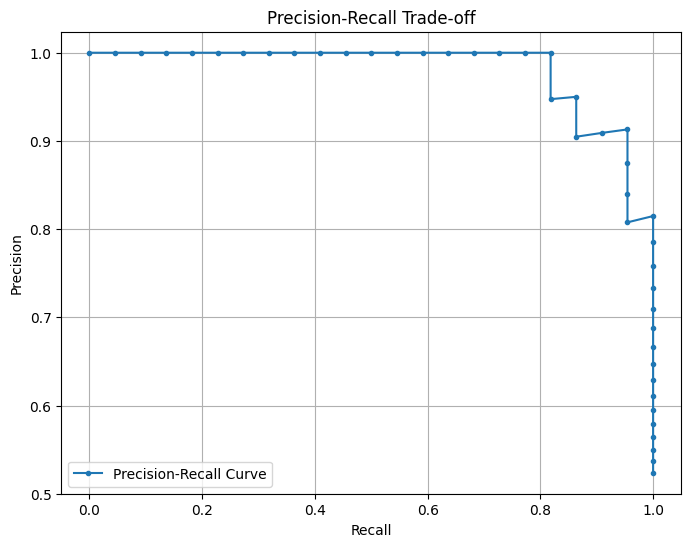

In [163]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off')
plt.grid(True)
plt.legend()
plt.show()


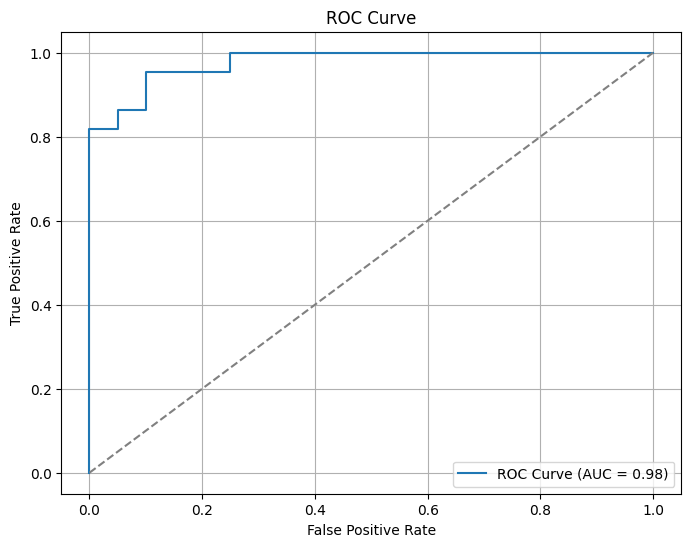

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()